In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense,Dropout,Activation, Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.utils import np_utils


In [6]:
batch_size = 128 
nb_classes = 10 

img_rows,img_cols = 28, 28

(X_train, Y_train),(X_test,Y_test ) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
X_train =X_train.astype("float32")
X_test=X_test.astype("float32")

X_train /= 255
X_test /= 255

print('X_train shape: ',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(Y_train,nb_classes)
Y_test = np_utils.to_categorical(Y_test,nb_classes)


print('one hot encoding : {}'.format(Y_train[0,:]))

X_train shape:  (60000, 1, 28, 28)
60000 train samples
10000 test samples
one hot encoding : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


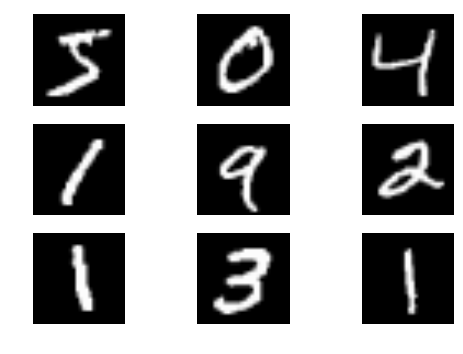

In [7]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,0], cmap='gray')
    plt.axis("off")
    


In [8]:
model = Sequential()

# convolutional2D(number_filters,row_size, column_size, input_Shape= (number+channels, img_row,img_col)) 
model.add(Convolution2D(6,5,5,input_shape=(1,img_rows,img_cols), border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16,5,5,border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Convolution2D(120,5,5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Dropout(0.25))

          
model.add(Flatten())
          
model.add(Dense(84))          
model.add(Activation('relu'))          
model.add(Dropout(0.5))     
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.compile(loss= 'categorical_crossentropy', optimizer='adadelta')

In [10]:
nb_epoch = 2 

model.fit(X_train,Y_train,batch_size=batch_size 
          ,nb_epoch=nb_epoch,show_accuracy= True, verbose=1,validation_data=(X_test,Y_test))

score = model.evaluate(X_test,Y_test,show_accuracy=True,verbose=0)

print('TEst score',score[0])
print('Text accuracy',score[1])


/Users/musaceylan/anaconda/lib/python3.5/site-packages/keras/models.py:580: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 71s - loss: 0.5680 - val_loss: 0.1092  256/60000 [..............................] - ETA: 52s - loss: 2.3026

/Users/musaceylan/anaconda/lib/python3.5/site-packages/keras/models.py:621: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


IndexError: invalid index to scalar variable.

9/9 [==============================] - 0s


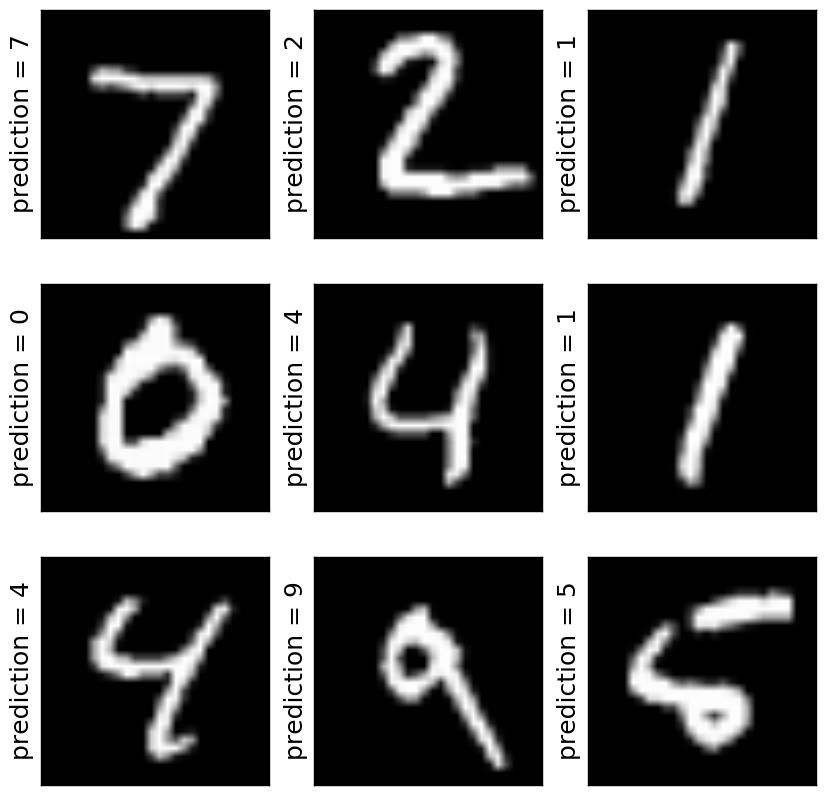

In [11]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i,0],cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" % res[i] ,fontsize =18)